# Data Mining Final Project
### Yazdan asadi 
#### 9517023104


## Exercise 1: 

We should make something modular, useful for each dataset! first we should import datasets as a single file:
then we choose each datasets by its number[1,2,3,...,10]!

In [52]:
import pandas as pd
import numpy as np
from os import walk
import math 
import random
from IPython.display import Image
import uuid
import pydot
from sklearn.model_selection import train_test_split
import graphviz 
import pprint
import matplotlib.pyplot as plt
import six

In [53]:
path = '/home/yazdan/Desktop/DM_Project'
df_dic = {}
for root, dirs, files in walk(path):
    for file in files:
        if root not in df_dic:
            df_dic[root] = [file]
        else:
            df_dic[root].append(file)

after we put all subfolders in the dictionary we choose to get datas in each folder to a dataframe

In [54]:
dfs = []
for i in df_dic:
    for f in df_dic[i]:
        if f.split('.')[-1] in ['trn','tst','data']:
            full_path = i + '/' + f
            dfs.append(full_path)

In [55]:
dfs

['/home/yazdan/Desktop/DM_Project/1-Balance Scale Database/balance-scale.data',
 '/home/yazdan/Desktop/DM_Project/2-Balloons Database/yellow-small.data',
 '/home/yazdan/Desktop/DM_Project/2-Balloons Database/adult+stretch.data',
 '/home/yazdan/Desktop/DM_Project/2-Balloons Database/adult-stretch.data',
 '/home/yazdan/Desktop/DM_Project/2-Balloons Database/yellow-small+adult-stretch.data',
 '/home/yazdan/Desktop/DM_Project/8-Adult Database/adult.data',
 '/home/yazdan/Desktop/DM_Project/7-Event Detection Database/CalIt2.data',
 '/home/yazdan/Desktop/DM_Project/7-Event Detection Database/Dodgers.data',
 '/home/yazdan/Desktop/DM_Project/6-Dermatology Database/dermatology.data',
 '/home/yazdan/Desktop/DM_Project/9-Abalone Database/abalone.data',
 '/home/yazdan/Desktop/DM_Project/4-Credit Screening Databases/crx.data',
 '/home/yazdan/Desktop/DM_Project/5-Cylinder Bands Database/bands.data',
 '/home/yazdan/Desktop/DM_Project/3-Wisconsin Breast Cancer Databases/wpbc.data',
 '/home/yazdan/Deskt

In [100]:
baloons_df_paths = dfs[1] +','+ dfs[2] +','+ dfs[3]

In [101]:
balance_df_path = dfs[0]

In [102]:
breast_df_paths = dfs[12] +','+ dfs[13] + ',' +dfs[14]

In [103]:
crx_df_path = dfs[10]

In [104]:
satimage_df_paths = dfs[15] +','+ dfs[16]

In [105]:
abalone_df_path = dfs[9]

In [106]:
adult_df_path = dfs[5]

Now we found 7 datasets including test and train csv files. its time to read this csv files 

In [107]:
datas = []
df = []
data_to_csv = balance_df_path #enter your desire dataset path
datas = data_to_csv.split(",")
for i in datas:
    df = pd.read_csv(i,sep=',')
    

In [108]:
df.head(200)

,Class-Name,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5
...,...,...,...,...,...
195,L,2,3,5,1
196,R,2,3,5,2
197,R,2,3,5,3
198,R,2,3,5,4


##### EDA and Preprocessing

step 1: Base on the problem and dataset we can drop the unnecessary columns!
For each dataset i made a "to_drop" list for droping the cols.

In [172]:
to_drop = [] #FILL THE LIST WITH COLS THAT YOU WANT!
class_labels = ['Class-Name']
df.drop(to_drop, inplace=True, axis=1)

step 2: Checking if the class label(s) is unique or not! and checking the values.

In [173]:
df['Class-Name'].unique()

array(['B', 'R', 'L'], dtype=object)

In [174]:
col_names = df.columns
for i in col_names:
      print('{} is unique: {}'.format(i, df[i].is_unique))

Class-Name is unique: False
Left-Weight is unique: False
Left-Distance is unique: False
Right-Weight is unique: False
Right-Distance is unique: False
tmp is unique: False


step 3: Checking the missing values and number of dirty values!

In [175]:
#Before (shape of df)
df.shape

(625, 6)

In [176]:
#after (shape of df)
rows_without_missing_data = df.dropna()
rows_without_missing_data.shape

(625, 6)

In [177]:
data_without_missing_columns = df.dropna(axis=1)
data_without_missing_columns.shape

(625, 6)

In [178]:
print(df.isnull().sum())

Class-Name        0
Left-Weight       0
Left-Distance     0
Right-Weight      0
Right-Distance    0
tmp               0
dtype: int64


In [179]:
df.duplicated().sum()

0

In [180]:
# Fill NaN with ' '
#df['col'] = df['col'].fillna(' ')
# Fill NaN with 99
#df['col'] = df['col'].fillna(99)
# Fill NaN with the mean of the column
#df['col'] = df['col'].fillna(df['col'].mean())

step 4: time to look at the information and describtion of our dataframe!

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Class-Name      625 non-null    object
 1   Left-Weight     625 non-null    int64 
 2   Left-Distance   625 non-null    int64 
 3   Right-Weight    625 non-null    int64 
 4   Right-Distance  625 non-null    int64 
 5   tmp             625 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 29.4+ KB


In [182]:
df.describe()

,Left-Weight,Left-Distance,Right-Weight,Right-Distance,tmp
count,625.000000,625.000000,625.000000,625.000000,625.000000
mean,3.000000,3.000000,3.000000,3.000000,1.382400
std,1.415346,1.415346,1.415346,1.415346,0.627375
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,1.000000
50%,3.000000,3.000000,3.000000,3.000000,1.000000
75%,4.000000,4.000000,4.000000,4.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,2.000000


step 5: Replacing the Classes with numbers and then we have label (y) for training!

In [183]:
class_to_num = {'B': 0,
                  'R': 1,
                  'L': 2}
df['tmp'] = df['Class-Name'].map(class_to_num)
y = df['tmp']

In [184]:
y

0      0
1      1
2      1
3      1
4      1
      ..
620    2
621    2
622    2
623    2
624    0
Name: tmp, Length: 625, dtype: int64

## Exercise 2: imbalanced data

For checking if our data is imbalance or not we can use shannon entroy equation:                              
0 for a unbalanced data set                                             
1 for a balanced data set

In [185]:
from scipy import stats
import itertools

In [186]:
pd_series = pd.Series(df.all)
counts = pd_series.value_counts()
entropy = stats.entropy(counts)
print(entropy)

0.0


## Exercise 5: Train/Test Split without sklearn and Producing Decision Tree!

In [202]:
df2 = df.copy()
df2.drop(class_labels,inplace=True, axis=1)
np.random.seed(43)
indices = list(range(df2.shape[0]))
num_training_indices = int(0.66 * df2.shape[0])
np.random.shuffle(indices)
train_indices = indices[:num_training_indices]
test_indices = indices[num_training_indices:]
# split the actual data
x_train, x_test = df2.iloc[train_indices], df2.iloc[test_indices]
y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

### *time to make our decision tree*

1.compute the entropy for data-set                      
2.for every attribute/feature:
                  1.calculate entropy for all categorical values
               2.take average information entropy for the current attribute
         3.calculate gain for the current attribute
3. pick the highest gain attribute.
4. Repeat until we get the tree we desired

In [235]:
def build_tree(data,y_field,level=0,tree=None,verbose=False):
    cols = list(data.columns)
    cols.remove(y_field)
    info_gains = []
    for col in cols:
        info_gains.append(round(info_gain(data,col,y_field),2))
    if verbose:
        print(cols,info_gains)
    if(len(set(info_gains))==1): 
        col_to_split_on = random.choice(cols)        
        values_to_split_on = data[col_to_split_on].unique()
        node = col_to_split_on
        if tree is None:
            tree = {}
            tree[node] = {}
        for value in values_to_split_on:
            sub_df = data[data[col_to_split_on]==value]
            if verbose:
                print(f'No info gain, uniques: {sub_df[y_field].unique()}')
            most_frequent = sub_df[y_field].mode()[0]
            if verbose:
                print(f'Setting {col_to_split_on} with value {value} as leaf with output {most_frequent}')
            tree[node][str(value)] = str(most_frequent)
    else:
        col_to_split_on = cols[info_gains.index(max(info_gains))]
        values_to_split_on = data[col_to_split_on].unique()
        node = col_to_split_on
        if tree is None:
            tree = {}
            tree[node] = {}
        for value in values_to_split_on:
            sub_df = data[data[col_to_split_on]==value]
            if verbose:
                print(f'Level->{level},total_cols:{cols}, Split on {col_to_split_on} on value {value}, uniques:{sub_df[y_field].unique()}')
            if len(sub_df[y_field].unique())==1:
                tree[node][str(value)] = str(sub_df[y_field].unique()[0])
                if verbose:
                    print(f'Level->{level}, Reached leaf for {col_to_split_on} at value {value} with output {sub_df[y_field].unique()[0]}')
            else:
                x = 'y'
                if x !='n':
                    tree[node][str(value)] = build_tree(sub_df,y_field,level=level+1,verbose=verbose)
                else:
                    tree[node][str(value)]=None
    return tree

In [236]:
def entropy(data,y_field):
    sum = 0
    for el in data[y_field].value_counts():
        prob = el/len(data)
        sum += prob*math.log(prob,2)
    sum*=-1
    return sum

In [237]:
def info_gain(data,attribute,y_field):
    current_entropy = entropy(data,y_field)
    uniques = data[attribute].value_counts().keys()
    sec_term = 0
    for i,cat_count in enumerate(data[attribute].value_counts()):
        sec_term += (cat_count/len(data))*entropy(data[data[attribute]==uniques[i]],y_field)
    entropy_for_attribute = current_entropy - sec_term
    return entropy_for_attribute


In [238]:
my_tree = build_tree(x_train,'tmp',verbose=True)

['Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance'] [0.12, 0.15, 0.17, 0.13]
Level->0,total_cols:['Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance'], Split on Right-Weight on value 1, uniques:[2 1 0]
['Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance'] [0.34, 0.12, 0.0, 0.08]
Level->1,total_cols:['Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance'], Split on Left-Weight on value 3, uniques:[2]
Level->1, Reached leaf for Left-Weight at value 3 with output 2
Level->1,total_cols:['Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance'], Split on Left-Weight on value 5, uniques:[2]
Level->1, Reached leaf for Left-Weight at value 5 with output 2
Level->1,total_cols:['Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance'], Split on Left-Weight on value 4, uniques:[2]
Level->1, Reached leaf for Left-Weight at value 4 with output 2
Level->1,total_cols:['Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance'], 

Level->2, Reached leaf for Left-Weight at value 4 with output 1
Level->2,total_cols:['Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance'], Split on Left-Weight on value 3, uniques:[1]
Level->2, Reached leaf for Left-Weight at value 3 with output 1
Level->2,total_cols:['Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance'], Split on Left-Weight on value 2, uniques:[1]
Level->2, Reached leaf for Left-Weight at value 2 with output 1
Level->2,total_cols:['Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance'], Split on Left-Weight on value 5, uniques:[0 1]
['Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance'] [0.0, 1.0, 0.0, 0.0]
Level->3,total_cols:['Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance'], Split on Left-Distance on value 4, uniques:[0]
Level->3, Reached leaf for Left-Distance at value 4 with output 0
Level->3,total_cols:['Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance'], Split on Left-Distance on valu

['Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance'] [0.44, 0.0, 0.0, 0.47]
Level->2,total_cols:['Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance'], Split on Right-Distance on value 1, uniques:[2 1]
['Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance'] [0.92, 0.0, 0.0, 0.0]
Level->3,total_cols:['Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance'], Split on Left-Weight on value 3, uniques:[2]
Level->3, Reached leaf for Left-Weight at value 3 with output 2
Level->3,total_cols:['Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance'], Split on Left-Weight on value 1, uniques:[1]
Level->3, Reached leaf for Left-Weight at value 1 with output 1
Level->3,total_cols:['Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance'], Split on Left-Weight on value 5, uniques:[2]
Level->3, Reached leaf for Left-Weight at value 5 with output 2
Level->2,total_cols:['Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance'], Spli

['Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance'] [0.81, 0.0, 0.0, 0.0]
Level->3,total_cols:['Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance'], Split on Left-Weight on value 1, uniques:[1]
Level->3, Reached leaf for Left-Weight at value 1 with output 1
Level->3,total_cols:['Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance'], Split on Left-Weight on value 4, uniques:[0]
Level->3, Reached leaf for Left-Weight at value 4 with output 0
Level->3,total_cols:['Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance'], Split on Left-Weight on value 3, uniques:[1]
Level->3, Reached leaf for Left-Weight at value 3 with output 1
Level->3,total_cols:['Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance'], Split on Left-Weight on value 2, uniques:[1]
Level->3, Reached leaf for Left-Weight at value 2 with output 1
Level->2,total_cols:['Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance'], Split on Right-Distance on value 1,

Level->1,total_cols:['Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance'], Split on Left-Distance on value 2, uniques:[2 0 1]
['Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance'] [0.89, 0.0, 0.0, 0.66]
Level->2,total_cols:['Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance'], Split on Left-Weight on value 5, uniques:[2 0]
['Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance'] [0.0, 0.0, 0.0, 0.81]
Level->3,total_cols:['Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance'], Split on Right-Distance on value 2, uniques:[2]
Level->3, Reached leaf for Right-Distance at value 2 with output 2
Level->3,total_cols:['Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance'], Split on Right-Distance on value 1, uniques:[2]
Level->3, Reached leaf for Right-Distance at value 1 with output 2
Level->3,total_cols:['Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance'], Split on Right-Distance on value 5, uniques:[0]
Level

Level->2,total_cols:['Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance'], Split on Right-Distance on value 5, uniques:[1]
Level->2, Reached leaf for Right-Distance at value 5 with output 1
Level->2,total_cols:['Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance'], Split on Right-Distance on value 4, uniques:[1]
Level->2, Reached leaf for Right-Distance at value 4 with output 1


In [239]:
def walk_dictionaryv2(graph, dictionary, parent_node=None):
    for k in dictionary.keys():

        if parent_node is not None:

            from_name = parent_node.get_name().replace("\"", "") + '_' + str(k)
            from_label = str(k)
            obj_dict = {}

            if 'True' in from_label:
                node_from = pydot.Node(from_name, color='white', style='filled',fillcolor='green', label=from_label)
            elif 'False' in from_label:
                node_from = pydot.Node(from_name, color='white', style='filled',fillcolor='red', label=from_label)
            else:
                node_from = pydot.Node(from_name, label=from_label)

            graph.add_node(node_from)

            graph.add_edge( pydot.Edge(parent_node, node_from) )

            if isinstance(dictionary[k], dict): # if interim node
                walk_dictionaryv2(graph, dictionary[k], node_from)

            else: # if leaf node
                to_name = str(uuid.uuid4()) + '_' + str(dictionary[k]) # unique name
                to_label = str(dictionary[k])

                node_to = pydot.Node(to_name, label=to_label, shape='box')
                graph.add_node(node_to)
                graph.add_edge(pydot.Edge(node_from, node_to))
        else:

            from_name =  str(k)
            from_label = str(k)

            node_from = pydot.Node(from_name, label=from_label)
            walk_dictionaryv2(graph, dictionary[k], node_from)


def plot_tree(tree, name):
    graph = pydot.Dot(graph_type='graph')
    walk_dictionaryv2(graph, tree)
    graph.write_png(name+'.png')

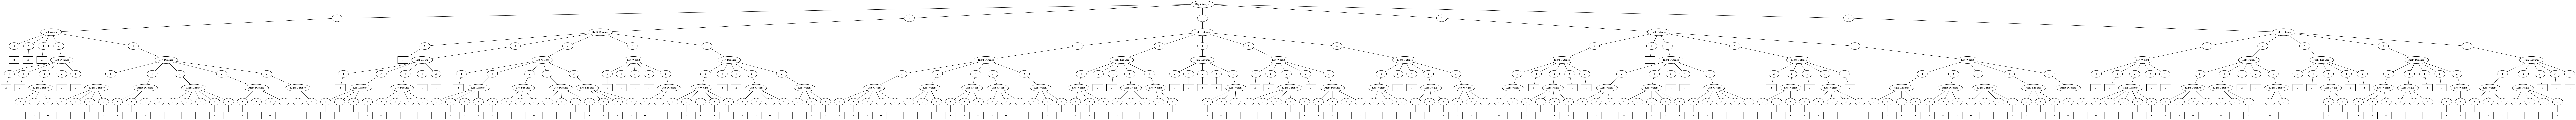

In [240]:
plot_tree(my_tree,'first')
Image(filename='first.png',unconfined=True) 

In [311]:
def load_csv_to_header_data(filename):
    fpath = os.path.join(os.getcwd(), filename)
    fs = csv.reader(open(fpath, newline='\n'))

    all_row = []
    for r in fs:
        all_row.append(r)

    headers = all_row[0]
    idx_to_name, name_to_idx = get_header_name_to_idx_maps(headers)

    data = {
        'header': headers,
        'rows': all_row[1:],
        'name_to_idx': name_to_idx,
        'idx_to_name': idx_to_name
    }
    return data


def get_header_name_to_idx_maps(headers):
    name_to_idx = {}
    idx_to_name = {}
    for i in range(0, len(headers)):
        name_to_idx[headers[i]] = i
        idx_to_name[i] = headers[i]
    return idx_to_name, name_to_idx


def project_columns(data, columns_to_project):
    data_h = list(data['header'])
    data_r = list(data['rows'])

    all_cols = list(range(0, len(data_h)))

    columns_to_project_ix = [data['name_to_idx'][name] for name in columns_to_project]
    columns_to_remove = [cidx for cidx in all_cols if cidx not in columns_to_project_ix]

    for delc in sorted(columns_to_remove, reverse=True):
        del data_h[delc]
        for r in data_r:
            del r[delc]

    idx_to_name, name_to_idx = get_header_name_to_idx_maps(data_h)

    return {'header': data_h, 'rows': data_r,
            'name_to_idx': name_to_idx,
            'idx_to_name': idx_to_name}


def get_uniq_values(data):
    idx_to_name = data['idx_to_name']
    idxs = idx_to_name.keys()

    val_map = {}
    for idx in iter(idxs):
        val_map[idx_to_name[idx]] = set()

    for data_row in data['rows']:
        for idx in idx_to_name.keys():
            att_name = idx_to_name[idx]
            val = data_row[idx]
            if val not in val_map.keys():
                val_map[att_name].add(val)
    return val_map


def get_class_labels(data, target_attribute):
    rows = data['rows']
    col_idx = data['name_to_idx'][target_attribute]
    labels = {}
    for r in rows:
        val = r[col_idx]
        if val in labels:
            labels[val] = labels[val] + 1
        else:
            labels[val] = 1
    return labels


def entropy(n, labels):
    ent = 0
    for label in labels.keys():
        p_x = labels[label] / n
        ent += - p_x * math.log(p_x, 2)
    return ent


def partition_data(data, group_att):
    partitions = {}
    data_rows = data['rows']
    partition_att_idx = data['name_to_idx'][group_att]
    for row in data_rows:
        row_val = row[partition_att_idx]
        if row_val not in partitions.keys():
            partitions[row_val] = {
                'name_to_idx': data['name_to_idx'],
                'idx_to_name': data['idx_to_name'],
                'rows': list()
            }
        partitions[row_val]['rows'].append(row)
    return partitions


def avg_entropy_w_partitions(data, splitting_att, target_attribute):
    # find uniq values of splitting att
    data_rows = data['rows']
    n = len(data_rows)
    partitions = partition_data(data, splitting_att)

    avg_ent = 0

    for partition_key in partitions.keys():
        partitioned_data = partitions[partition_key]
        partition_n = len(partitioned_data['rows'])
        partition_labels = get_class_labels(partitioned_data, target_attribute)
        partition_entropy = entropy(partition_n, partition_labels)
        avg_ent += partition_n / n * partition_entropy

    return avg_ent, partitions


def most_common_label(labels):
    mcl = max(labels, key=lambda k: labels[k])
    return mcl


def id3(data, uniqs, remaining_atts, target_attribute):
    labels = get_class_labels(data, target_attribute)

    node = {}

    if len(labels.keys()) == 1:
        node['label'] = next(iter(labels.keys()))
        return node

    if len(remaining_atts) == 0:
        node['label'] = most_common_label(labels)
        return node

    n = len(data['rows'])
    ent = entropy(n, labels)

    max_info_gain = None
    max_info_gain_att = None
    max_info_gain_partitions = None

    for remaining_att in remaining_atts:
        avg_ent, partitions = avg_entropy_w_partitions(data, remaining_att, target_attribute)
        info_gain = ent - avg_ent
        if max_info_gain is None or info_gain > max_info_gain:
            max_info_gain = info_gain
            max_info_gain_att = remaining_att
            max_info_gain_partitions = partitions

    if max_info_gain is None:
        node['label'] = most_common_label(labels)
        return node

    node['attribute'] = max_info_gain_att
    node['nodes'] = {}

    remaining_atts_for_subtrees = set(remaining_atts)
    remaining_atts_for_subtrees.discard(max_info_gain_att)

    uniq_att_values = uniqs[max_info_gain_att]

    for att_value in uniq_att_values:
        if att_value not in max_info_gain_partitions.keys():
            node['nodes'][att_value] = {'label': most_common_label(labels)}
            continue
        partition = max_info_gain_partitions[att_value]
        node['nodes'][att_value] = id3(partition, uniqs, remaining_atts_for_subtrees, target_attribute)

    return node


def load_config(config_file):
    with open(config_file, 'r') as myfile:
        data = myfile.read().replace('\n', '')
    return ast.literal_eval(data)


def pretty_print_tree(root):
    stack = []
    rules = set()

    def traverse(node, stack, rules):
        if 'label' in node:
            stack.append(' THEN ' + node['label'])
            rules.add(''.join(stack))
            stack.pop()
        elif 'attribute' in node:
            ifnd = 'IF ' if not stack else ' AND '
            stack.append(ifnd + node['attribute'] + ' EQUALS ')
            for subnode_key in node['nodes']:
                stack.append(subnode_key)
                traverse(node['nodes'][subnode_key], stack, rules)
                stack.pop()
            stack.pop()

    traverse(root, stack, rules)
    print(os.linesep.join(rules))

In [312]:
data = load_csv_to_header_data(config['data_file'])
data = project_columns(data, config['data_project_columns'])

target_attribute = config['target_attribute']
remaining_attributes = set(data['header'])
remaining_attributes.remove(target_attribute)

uniqs = get_uniq_values(data)

root = id3(data, uniqs, remaining_attributes, target_attribute)

pretty_print_tree(root)


NameError: name 'config' is not defined

{'Class-Name': {'B': 0, 'L': 2, 'R': 1}}


### Comparing the model with sklearn classifier 

In [151]:
from sklearn.tree import DecisionTreeClassifier

In [152]:
clf_ent = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
# fit the model
clf_ent.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [153]:
y_pred_ent = clf_ent.predict(x_test)

In [154]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_ent))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.75      0.76      0.75       100
           2       0.72      0.80      0.76        99

    accuracy                           0.73       213
   macro avg       0.49      0.52      0.50       213
weighted avg       0.69      0.73      0.71       213



In [155]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion entropy: 0.7277


In [156]:
y_pred_train_ent = clf_ent.predict(x_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_ent)))


Training-set accuracy score: 0.8034


In [157]:
print('Training set score: {:.4f}'.format(clf_ent.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf_ent.score(x_test, y_test)))

Training set score: 0.8034
Test set score: 0.7277


In [160]:
df

,Class-Name,Left-Weight,Left-Distance,Right-Weight,Right-Distance,tmp
0,B,1,1,1,1,0
1,R,1,1,1,2,1
2,R,1,1,1,3,1
3,R,1,1,1,4,1
4,R,1,1,1,5,1
...,...,...,...,...,...,...
620,L,5,5,5,1,2
621,L,5,5,5,2,2
622,L,5,5,5,3,2
623,L,5,5,5,4,2


## Exercise 8 : APRIOR / FP-Growth for freq-itemsets

In [300]:
x_train[:tmp]

NameError: name 'tmp' is not defined

## Exercise 3: Percision / Recall / F-Measure

In [97]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_train, 
                                                           y_train_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train,
                                                     y_train_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train,
                                             y_train_pred, 
                                             average='weighted')))

NameError: name 'precision_score' is not defined

## Exercise 6: Cross-Fold-Validation / 3FV / 5FV